In [ ]:
import mysql.connector as connector
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# create MySQL connection
con = connector.connect(
    host='localhost',
    port='3306',
    user='root',
    password='Highlight6804@',
    database='project'
)

# create SQLalchemy engine
engine = create_engine('mysql+mysqlconnector://root:Highlight6804@@localhost:3306/project')

# load data from MySQL tables into Pandas DataFrames
tesla_df = pd.read_sql('SELECT * FROM tesla_stock_price', con=con)
li_df = pd.read_sql('SELECT * FROM li_stock_price', con=con)
lucid_df = pd.read_sql('SELECT * FROM lucid_stock_price', con=con)

# explore the data
print(tesla_df.head())
print(li_df.head())
print(lucid_df.head())

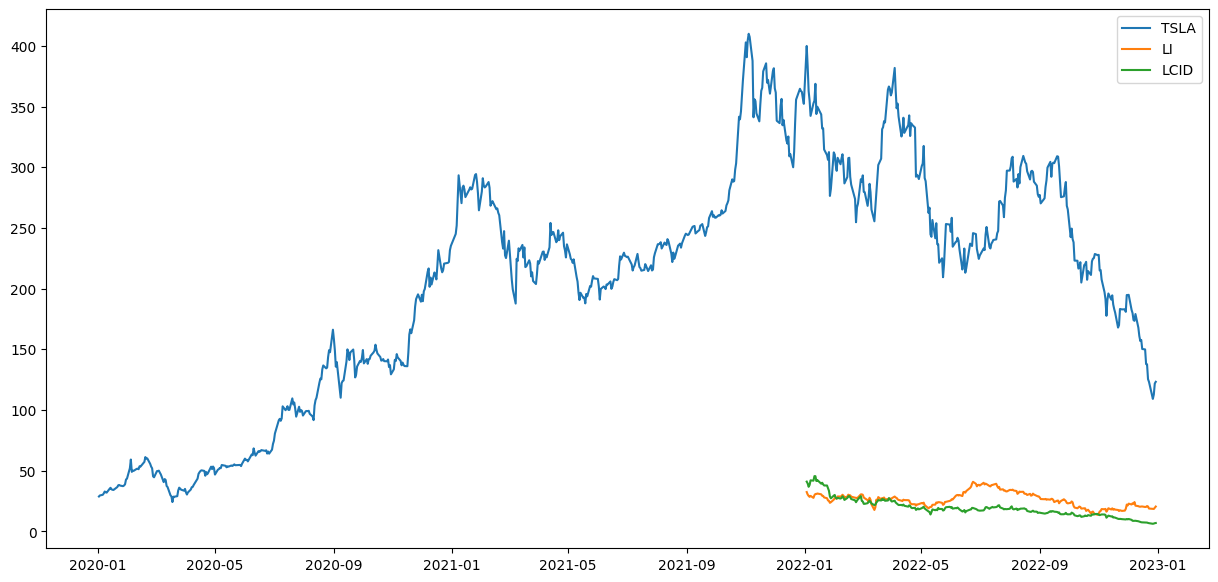

In [14]:
# create figure and axes objects
fig, ax = plt.subplots(figsize=(15,7))

# visualize the data
ax.plot(tesla_df['trade_date'], tesla_df['close_price'], label='TSLA')
ax.plot(li_df['trade_date'], li_df['close_price'], label='LI')
ax.plot(lucid_df['trade_date'], lucid_df['close_price'], label='LCID')
ax.legend()
plt.show()


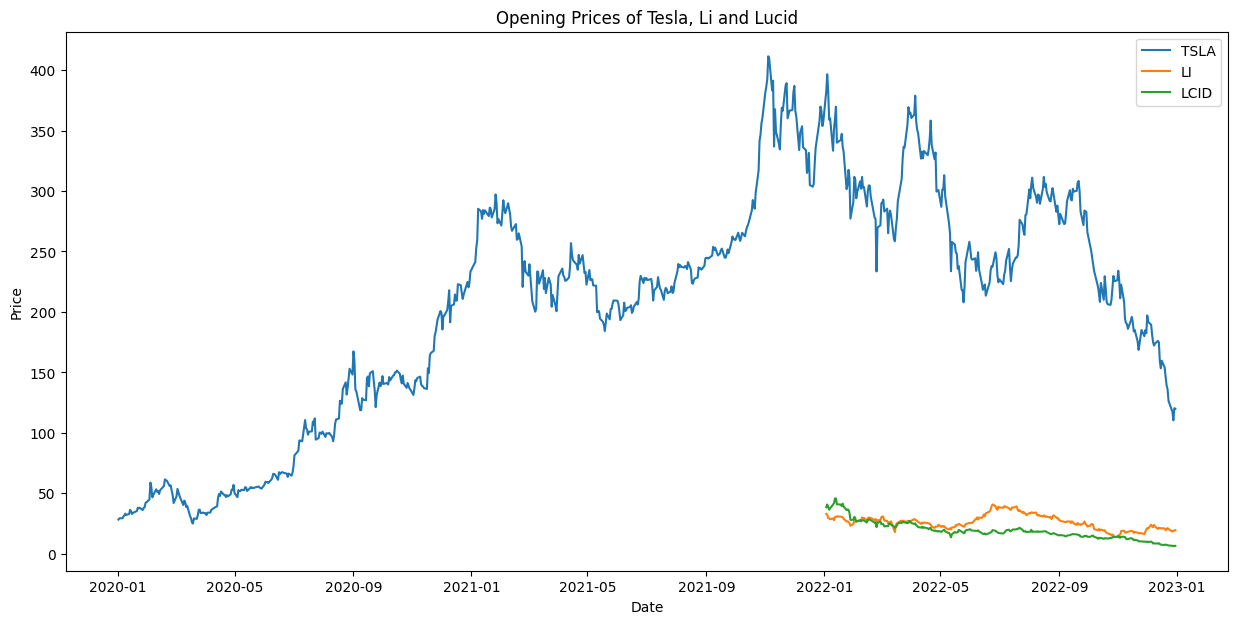

In [10]:
# create figure and axes for opening prices chart
fig1, ax1 = plt.subplots(figsize=(15,7))

# plot opening prices
ax1.plot(tesla_df['trade_date'], tesla_df['open_price'], label='TSLA')
ax1.plot(li_df['trade_date'], li_df['open_price'], label='LI')
ax1.plot(lucid_df['trade_date'], lucid_df['open_price'], label='LCID')

# set title and axis labels
ax1.set_title('Opening Prices of Tesla, Li and Lucid')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

# add legend
ax1.legend()

# show the plot
plt.show()

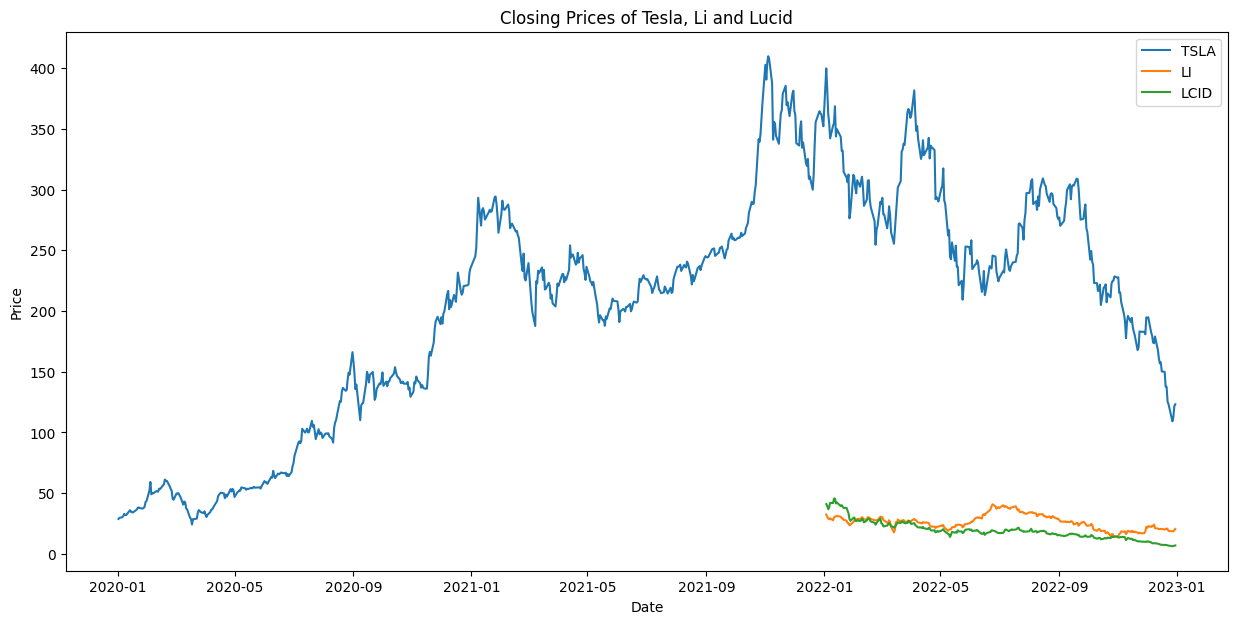

In [11]:
# create figure and axes for closing prices chart
fig2, ax2 = plt.subplots(figsize=(15,7))

# plot closing prices
ax2.plot(tesla_df['trade_date'], tesla_df['close_price'], label='TSLA')
ax2.plot(li_df['trade_date'], li_df['close_price'], label='LI')
ax2.plot(lucid_df['trade_date'], lucid_df['close_price'], label='LCID')

# set title and axis labels
ax2.set_title('Closing Prices of Tesla, Li and Lucid')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')

# add legend
ax2.legend()

# show the plot
plt.show()

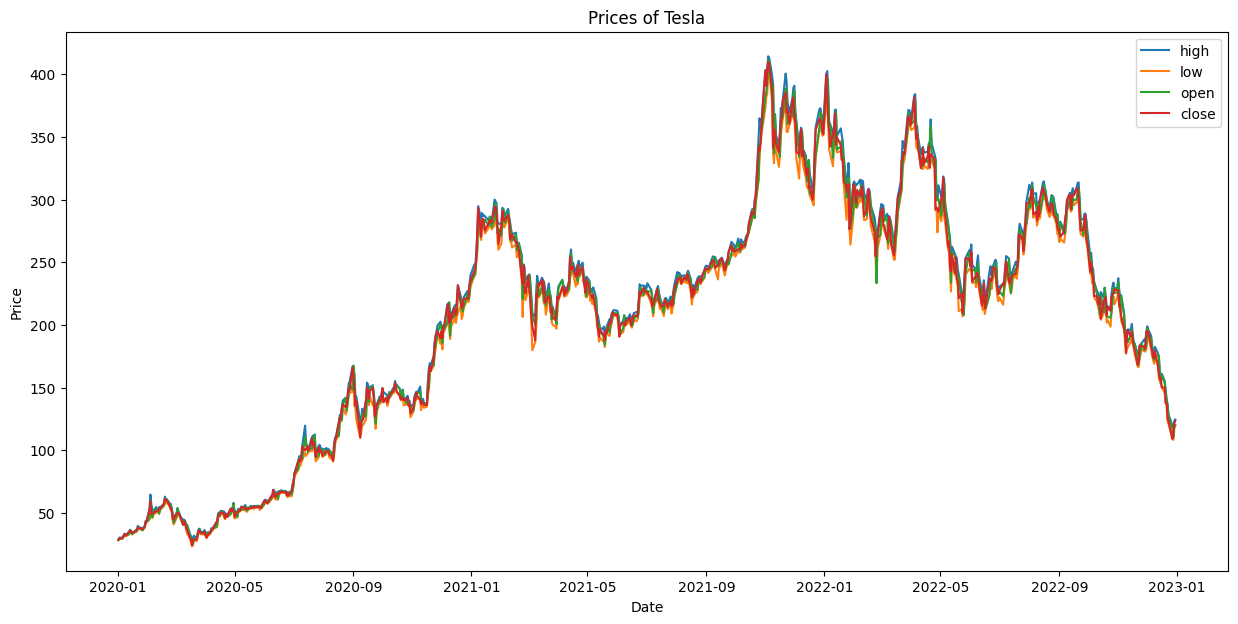

In [12]:
# create figure and axes for Tesla's prices chart
fig3, ax3 = plt.subplots(figsize=(15,7))

# plot Tesla's prices
ax3.plot(tesla_df['trade_date'], tesla_df['high_price'], label='high')
ax3.plot(tesla_df['trade_date'], tesla_df['low_price'], label='low')
ax3.plot(tesla_df['trade_date'], tesla_df['open_price'], label='open')
ax3.plot(tesla_df['trade_date'], tesla_df['close_price'], label='close')

# set title and axis labels
ax3.set_title('Prices of Tesla')
ax3.set_xlabel('Date')
ax3.set_ylabel('Price')

# add legend
ax3.legend()

# show the plot
plt.show()

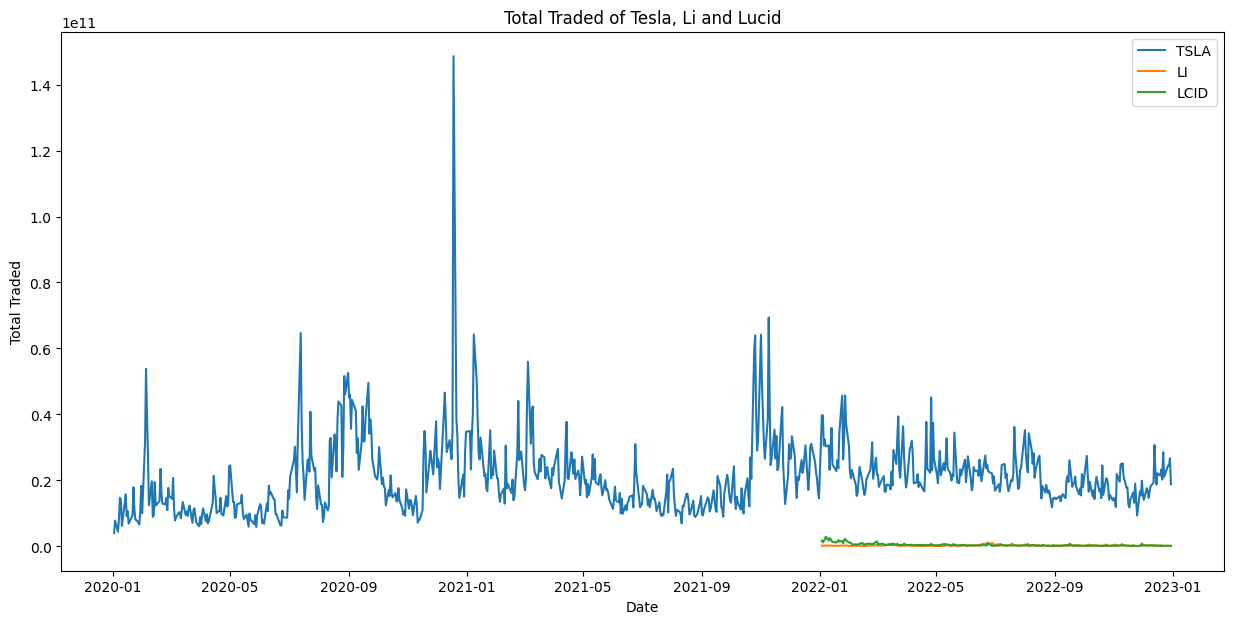

In [13]:
# add total traded column to Tesla dataframe
tesla_df['total_traded'] = tesla_df['open_price'] * tesla_df['volume']

# add total traded column to Li dataframe
li_df['total_traded'] = li_df['open_price'] * li_df['volume']

# add total traded column to Lucid dataframe
lucid_df['total_traded'] = lucid_df['open_price'] * lucid_df['volume']

# create figure and axes for total traded chart
fig4, ax4 = plt.subplots(figsize=(15,7))

# plot total traded
ax4.plot(tesla_df['trade_date'], tesla_df['total_traded'], label='TSLA')
ax4.plot(li_df['trade_date'], li_df['total_traded'], label='LI')
ax4.plot(lucid_df['trade_date'], lucid_df['total_traded'], label='LCID')

# set title and axis labels
ax4.set_title('Total Traded of Tesla, Li and Lucid')
ax4.set_xlabel('Date')
ax4.set_ylabel('Total Traded')

# add legend
ax4.legend()

# show the plot
plt.show()

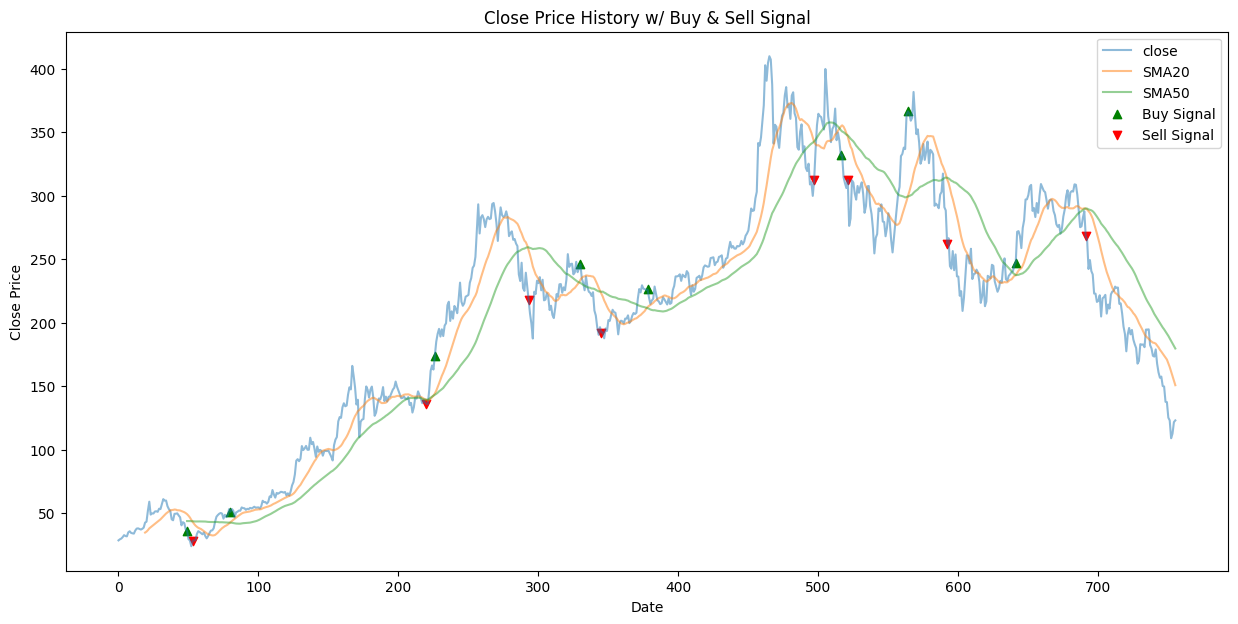

In [5]:
import numpy as np

# add 20-day Simple Moving Average (SMA) and 50-day SMA to Tesla dataframe

def SMA(data, period = 50, column='close_price'):
    return data[column].rolling(window=period).mean()

tesla_df['SMA20'] = SMA(tesla_df, 20)
tesla_df['SMA50'] = SMA(tesla_df, 50)

tesla_df['Signal'] = np.where(tesla_df['SMA20'] > tesla_df['SMA50'], 1, 0)
tesla_df['Position'] = tesla_df['Signal'].diff()

tesla_df['Buy'] = np.where(tesla_df['Position'] == 1, tesla_df['close_price'], np.NAN)
tesla_df['Sell'] = np.where(tesla_df['Position'] == -1, tesla_df['close_price'], np.NAN)

# create figure and axes for Tesla's prices chart
fig5, ax5 = plt.subplots(figsize=(15,7))

# plot closing price and moving averages
ax5.plot(tesla_df['close_price'], alpha=0.5, label='close')
ax5.plot(tesla_df['SMA20'], alpha=0.5, label='SMA20')
ax5.plot(tesla_df['SMA50'], alpha=0.5, label='SMA50')

# plot buy and sell signals
ax5.scatter(tesla_df.index, tesla_df['Buy'], alpha=1, label='Buy Signal', marker='^', color='green')
ax5.scatter(tesla_df.index, tesla_df['Sell'], alpha=1, label='Sell Signal', marker='v', color='red')

# set title and axis labels
ax5.set_title('Close Price History w/ Buy & Sell Signal')
ax5.set_xlabel('Date')
ax5.set_ylabel('Close Price')

# add legend
ax5.legend()

# show the plot
plt.show()


array([[<Axes: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Li Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Lucid Open', ylabel='Tesla Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='Li Open'>,
        <Axes: xlabel='Li Open', ylabel='Li Open'>,
        <Axes: xlabel='Lucid Open', ylabel='Li Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='Lucid Open'>,
        <Axes: xlabel='Li Open', ylabel='Lucid Open'>,
        <Axes: xlabel='Lucid Open', ylabel='Lucid Open'>]], dtype=object)

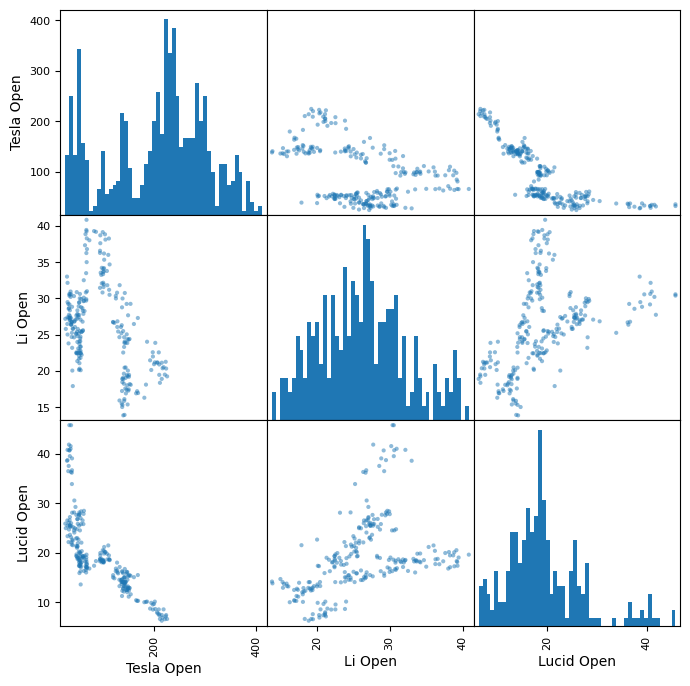

In [15]:
# create a scatter matrix plot to compare the opening prices

from pandas.plotting import scatter_matrix

car_comp = pd.concat([tesla_df['open_price'], li_df['open_price'], lucid_df['open_price']], axis=1)
car_comp.columns = ['Tesla Open', 'Li Open', 'Lucid Open']

scatter_matrix(car_comp, figsize=(8,8), hist_kwds={'bins': 50})

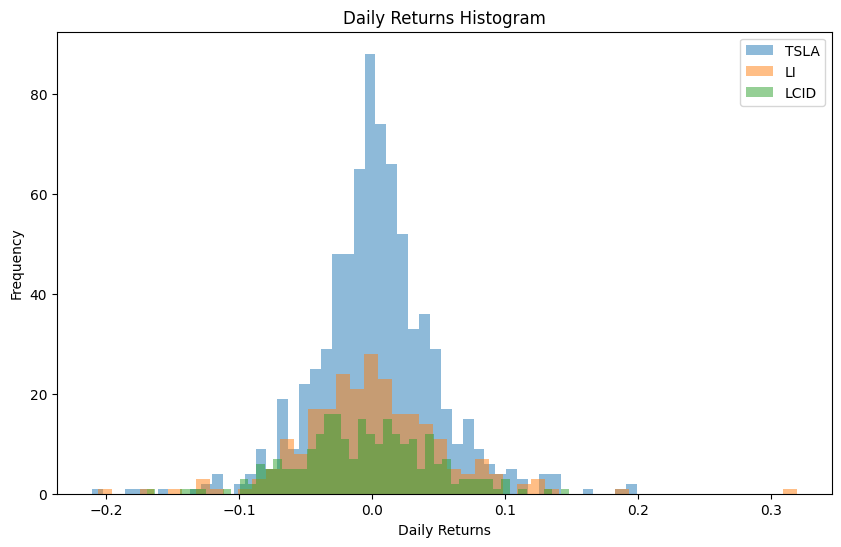

In [22]:
# calculate daily returns for each stock
tesla_daily_returns = (tesla_df['close_price'] / tesla_df['close_price'].shift(1)) - 1
li_daily_returns = (li_df['close_price'] / li_df['close_price'].shift(1)) - 1
lucid_daily_returns = (lucid_df['close_price'] / lucid_df['close_price'].shift(1)) - 1

# create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# plot histogram for TSLA daily returns
ax.hist(tesla_daily_returns, bins=50, alpha=0.5, label='TSLA')

# plot histogram for LI daily returns
ax.hist(li_daily_returns, bins=50, alpha=0.5, label='LI')

# plot histogram for LCID daily returns
ax.hist(lucid_daily_returns, bins=50, alpha=0.5, label='LCID')

# set title and labels
ax.set_title('Daily Returns Histogram')
ax.set_xlabel('Daily Returns')
ax.set_ylabel('Frequency')

# add legend
ax.legend()

# show the plot
plt.show()
